<p>This is our corrected, final version for this project.</p>

In [48]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
import datetime
from sklearn.linear_model import LinearRegression
import operator
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

### Testing and training the final training data.

<https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html><br>
<https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/>
<p>Let's create our dataframe from final_df.csv that was made in West Nile Predictor - Creation of Final Dataframe.ipynb. Let's also turn the string values of trap into increment values using LabelEncoder. If we don't do this then random forest gives us an error: ValueError: could not convert string to float: 'T011'" (that's the first value in trap).</p>
<p>We are also going to have to oversample the minority 'yes'/1 for WnvPresent since our dataset is unbalanced their is a greatly misrepresented minority and an over represented majority ('no'/0). This will allow us to have ML that predicts yes or no to West Nile Virus and not yes to 'no West Nile Virus'.</p>

In [49]:
final_df = pd.read_csv('final_df.csv')

In [50]:
#for future use in ML algorithms
accuracy_list = []

<https://docs.python.org/3/library/datetime.html#datetime.date.fromordinal> 

<p>date.toordinal is used to convert the dates that are interpreted as strings to ordinal values which are ints. This allows logistic regression to use them because it doesn't want strings. This also allows us to use the Date feature because before it was dropped entirely.</p>

In [51]:
#create a label (category) encoder object
le = preprocessing.LabelEncoder()

#fit the encoder to the pandas column
le.fit(list(final_df['Trap'].values))

#view labels
print(le.classes_)

#apply the fitted encoder to the pandas columns
final_df['Trap'] = le.transform(list(final_df['Trap'].values))

#add a column that holds the ordinal versions of our dates
final_df['Date Ordinal'] = pd.to_datetime(final_df['Date']).apply(lambda date: date.toordinal())

#dropping date since random forest won't work with datetime and wants it as a float or int
#we have the ordinal versions now that are ints
final_df.drop('Date', axis=1, inplace=True)

#The majority being trace snow, originally 'T' in the original weather.csv
#'T' or 0.05 being a small minority with the majority being 0
final_df.drop('SnowFall', axis=1, inplace=True)

#columns to change from float64 to int64
cols_to_int = ['WnvPresent', 'CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX SALINARIUS',
               'CULEX TARSALIS', 'CULEX TERRITANS', '<= 90 days', '<= 183 days', '<= 365 days', '<= 730 days', '> 730 days',
              '<= 1/2 mile', '<= 1 mile', '<= 3 miles', '<= 5 miles', '> 5 miles']

#changing features type to int64
final_df[cols_to_int] = final_df[cols_to_int].astype('int64')

display(final_df.head(3), final_df.info())



['T001' 'T002' 'T003' 'T004' 'T005' 'T006' 'T007' 'T008' 'T009' 'T011'
 'T012' 'T013' 'T014' 'T015' 'T016' 'T017' 'T018' 'T019' 'T025' 'T027'
 'T028' 'T030' 'T031' 'T033' 'T034' 'T035' 'T036' 'T037' 'T039' 'T040'
 'T043' 'T044' 'T045' 'T046' 'T047' 'T048' 'T049' 'T050' 'T051' 'T054'
 'T054C' 'T060' 'T061' 'T062' 'T063' 'T065' 'T066' 'T067' 'T069' 'T070'
 'T071' 'T072' 'T073' 'T074' 'T075' 'T076' 'T077' 'T078' 'T079' 'T080'
 'T081' 'T082' 'T083' 'T084' 'T085' 'T086' 'T088' 'T089' 'T090' 'T091'
 'T092' 'T094' 'T094B' 'T095' 'T096' 'T097' 'T099' 'T100' 'T102' 'T103'
 'T107' 'T114' 'T115' 'T128' 'T129' 'T135' 'T138' 'T141' 'T142' 'T143'
 'T144' 'T145' 'T146' 'T147' 'T148' 'T149' 'T150' 'T151' 'T152' 'T153'
 'T154' 'T155' 'T156' 'T157' 'T158' 'T159' 'T160' 'T161' 'T162' 'T200'
 'T206' 'T209' 'T212' 'T215' 'T218' 'T219' 'T220' 'T221' 'T222' 'T223'
 'T224' 'T225' 'T226' 'T227' 'T228' 'T229' 'T230' 'T231' 'T232' 'T233'
 'T235' 'T236' 'T237' 'T238' 'T900' 'T903']
<class 'pandas.core.frame.DataF

,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,CULEX ERRATICUS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,...,<= 730 days,> 730 days,<= 1/2 mile,<= 1 mile,<= 3 miles,<= 5 miles,> 5 miles,Station 1,Station 2,Date Ordinal
0,1,41.954690,-87.800991,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,732825
1,1,41.954690,-87.800991,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,732825
2,6,41.994991,-87.769279,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,732825


None

Let's create our feature matrix and label vector. Train and test then get our prediction. Remember this is the train data set first given to us by the kaggle competition. The 'test' data set is for creating a prediction that we were suppose to submit as part of the contest. 

In [52]:
feature_columns = final_df.columns.difference(['WnvPresent'])

X = final_df[feature_columns]

y = final_df['WnvPresent']

display(X.head(3), y.head(3))

,<= 1 mile,<= 1/2 mile,<= 183 days,<= 3 miles,<= 365 days,<= 5 miles,<= 730 days,<= 90 days,> 5 miles,> 730 days,...,ResultSpeed,SeaLevel,Station 1,Station 2,StnPressure,Tavg,Tmax,Tmin,Trap,WetBulb
0,0,0,0,0,0,0,0,0,0,0,...,5.8,30.11,1,0,29.39,74.0,88.0,60.0,1,65.0
1,0,0,0,0,0,0,0,0,0,0,...,5.8,30.11,1,0,29.39,74.0,88.0,60.0,1,65.0
2,0,0,0,0,0,0,0,0,0,0,...,5.8,30.11,1,0,29.39,74.0,88.0,60.0,6,65.0


0    0
1    0
2    0
Name: WnvPresent, dtype: int64

In [53]:
# Randomly splitting the original dataset into training set and testing set:
#Test size 30% Train size 70% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# print the size of the traning set:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

# print the size of the testing set:
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

print("\nValue count of y_test:")
print(y_test.value_counts())

X_train:  (6223, 39)
y_train:  (6223,)
X_test:  (2667, 39)
y_test:  (2667,)

Value count of y_test:
0    2534
1     133
Name: WnvPresent, dtype: int64


<span style="color:red"><b>WARNING!</b></span><br>
<https://towardsdatascience.com/handling-imbalanced-datasets-in-deep-learning-f48407a0e758><br>
<https://beckernick.github.io/oversampling-modeling/>
<p>Edit: this was figured out after everything else was coded. Notice how the mean for train is 5%. This means that 5% of the time the ML algorithm is taught to say 'yes' or '1' to West Nile Virus and 95% of the time is taught to say 'no' or '0'. This is why we are getting 95% accuracy for all classification ML. It's not predicting the virus, it's telling us how accurate it can say no or 0.</p>
<p>This is happening because of unbalanced data. Our minority, 1, is under represented while our majority, 0, is over representented. What needs to happen is a resampling of random data that gives us an equal representation of our majority and minority.</p>

In [54]:
print(y_train.mean())
print("\nValue count of y_test:\n")
print(y_train.value_counts())

0.0527076972521292

Value count of y_test:

0    5895
1     328
Name: WnvPresent, dtype: int64


<https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html>
<p>Let's perform some random over-sampling to generate new samples to use in our ML algorithms. We want 50% yes and 50% no for our resampled X and y.</p>

In [55]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

print("Value count of Label Vector y: ") 
print(y.value_counts())
print("\nValue count of y_resampled: ")
print(y_resampled.value_counts())

Value count of Label Vector y: 
0    8429
1     461
Name: WnvPresent, dtype: int64

Value count of y_resampled: 
1    8429
0    8429
Name: WnvPresent, dtype: int64


In [56]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16858 entries, 0 to 16857
Data columns (total 39 columns):
<= 1 mile                 16858 non-null int64
<= 1/2 mile               16858 non-null int64
<= 183 days               16858 non-null int64
<= 3 miles                16858 non-null int64
<= 365 days               16858 non-null int64
<= 5 miles                16858 non-null int64
<= 730 days               16858 non-null int64
<= 90 days                16858 non-null int64
> 5 miles                 16858 non-null int64
> 730 days                16858 non-null int64
AvgSpeed                  16858 non-null float64
CULEX ERRATICUS           16858 non-null int64
CULEX PIPIENS             16858 non-null int64
CULEX PIPIENS/RESTUANS    16858 non-null int64
CULEX RESTUANS            16858 non-null int64
CULEX SALINARIUS          16858 non-null int64
CULEX TARSALIS            16858 non-null int64
CULEX TERRITANS           16858 non-null int64
Cool                      16858 non-null fl

<p>Let's test, train, and split with the new resampled X and y.</p>

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=2)

# print the size of the traning set:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

# print the size of the testing set:
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (11800, 39)
y_train:  (11800,)
X_test:  (5058, 39)
y_test:  (5058,)


In [58]:
#X_resampled['SnowFall'].value_counts()

### Logistic Regression

In [59]:
my_logreg = LogisticRegression(solver='liblinear')

# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)

[0 1 1 ... 0 1 1]


In [60]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_lr = accuracy_score(y_test, y_predict_lr)

accuracy_list.append(('Logistic Regression', score_lr))

print(score_lr)

0.8786081455120601


In [61]:
# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)

In [62]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print("\n", y_predict_lr)

# This line prints the "estimated likelihood of both label" for the testing set:
print("\n", y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print("\n", y_predict_prob_lr[:,1])

4178     0
14984    1
10749    1
12940    1
10961    1
        ..
15180    1
15608    1
7058     0
13046    1
16571    1
Name: WnvPresent, Length: 5058, dtype: int64

 [0 1 1 ... 0 1 1]

 [[9.05050394e-01 9.49496056e-02]
 [8.89343649e-04 9.99110656e-01]
 [3.39184656e-02 9.66081534e-01]
 ...
 [5.10714760e-01 4.89285240e-01]
 [2.99558597e-02 9.70044140e-01]
 [1.03379250e-02 9.89662075e-01]]

 [0.09494961 0.99911066 0.96608153 ... 0.48928524 0.97004414 0.98966207]


In [63]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.97140588e-04 3.97140588e-04 7.94281176e-04
 7.94281176e-04 1.19142176e-03 1.19142176e-03 1.58856235e-03
 1.58856235e-03 1.98570294e-03 1.98570294e-03 2.38284353e-03
 2.38284353e-03 2.77998411e-03 2.77998411e-03 3.17712470e-03
 3.17712470e-03 3.57426529e-03 3.57426529e-03 3.97140588e-03
 3.97140588e-03 4.36854647e-03 4.36854647e-03 4.76568705e-03
 4.76568705e-03 5.16282764e-03 5.16282764e-03 5.55996823e-03
 5.55996823e-03 5.95710882e-03 5.95710882e-03 6.35424940e-03
 6.35424940e-03 6.75138999e-03 6.75138999e-03 7.14853058e-03
 7.14853058e-03 7.54567117e-03 7.54567117e-03 7.94281176e-03
 7.94281176e-03 8.33995234e-03 8.33995234e-03 8.73709293e-03
 8.73709293e-03 9.13423352e-03 9.13423352e-03 9.53137411e-03
 9.53137411e-03 9.928514

AUC:  0.947281228696691


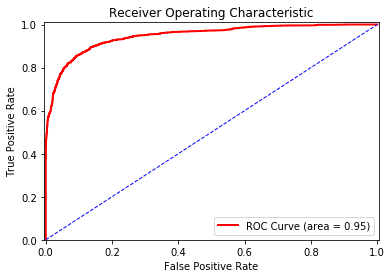

In [64]:
AUC_logreg = metrics.auc(fpr, tpr)

print("AUC: ", AUC_logreg)

plt.figure()

plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC_logreg)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()

### Linear Regression

<p>Using Linear Regression on the training set. Checking the coefficent's of the model to find the most to least important.</p>

In [65]:
#create classifier
my_linreg = LinearRegression()

#train
my_linreg.fit(X_train, y_train)

#check coefficients, numbers need to be absolute to determin best/worst
coefficients = abs(my_linreg.coef_)

#create tuple list of feature/coefficient pairings and sort by coefficient by descending order
name_coefficient_tuples = list(zip(X_resampled.columns, coefficients))
name_coefficient_tuples.sort(key = operator.itemgetter(1), reverse=True)

print("Coefficients in Descending Order:")

for a,b in name_coefficient_tuples:
    print("{:<12}\t\t{}".format(a,b))
    
#print most and least important
print("\n\nMost Important Feature: ", name_coefficient_tuples[0][0])
print("Least Important Feature: ", name_coefficient_tuples[-1][0])

Coefficients in Descending Order:
CULEX ERRATICUS		0.7780750270693361
CULEX RESTUANS		0.6427840928812135
CULEX SALINARIUS		0.6379708103377716
CULEX TERRITANS		0.624361469356632
CULEX TARSALIS		0.5882379029960064
CULEX PIPIENS/RESTUANS		0.4774463663916712
Longitude   		0.42315445607475677
CULEX PIPIENS		0.3790556231458993
Station 2   		0.30768020929441586
Station 1   		0.29682882346247774
Latitude    		0.15734803473692993
<= 730 days 		0.12321438291169169
> 5 miles   		0.12321438291156438
<= 3 miles  		0.11795200241701624
<= 1 mile   		0.06799557742815118
PrecipTotal 		0.06689015963736396
<= 1/2 mile 		0.04816064059668605
<= 5 miles  		0.040298302021965555
<= 183 days 		0.03101938632224314
<= 365 days 		0.031019386322079758
<= 90 days  		0.031019386321846358
SeaLevel    		0.02770646632632314
AvgSpeed    		0.01868955694497872
DewPoint    		0.01110038485704602
NumMosquitos		0.009070557519945618
Depart      		0.00816624661187031
Heat        		0.005998396901029812
Tmax        		0.0058995586

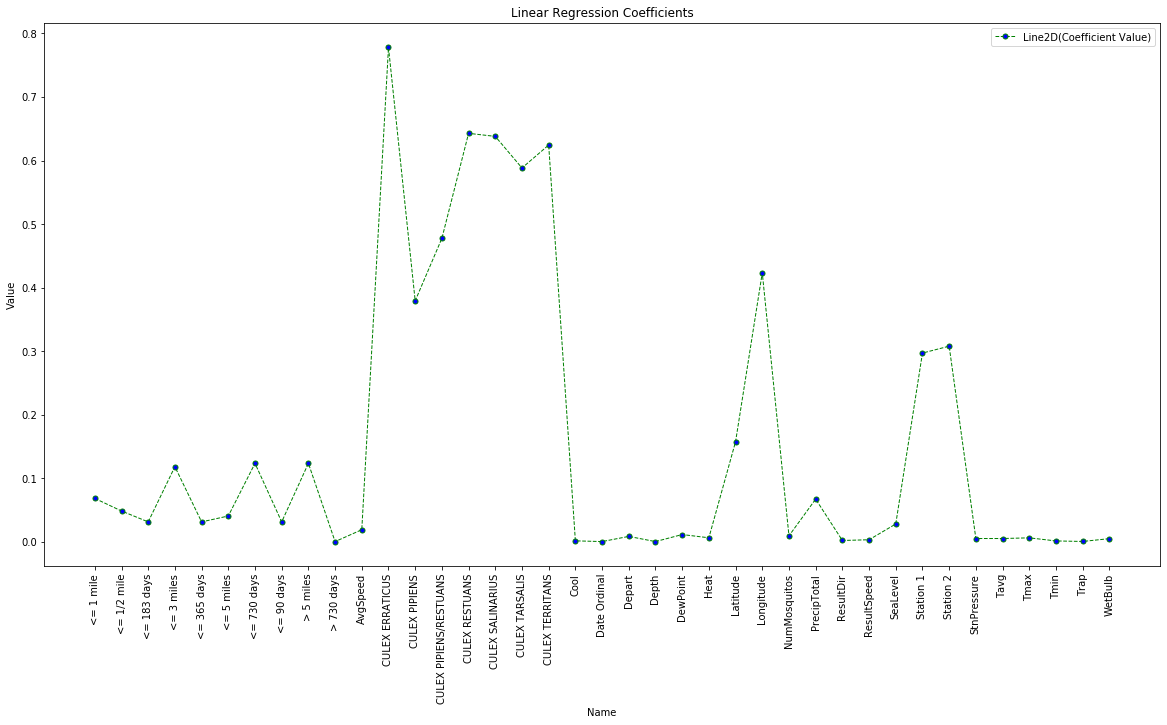

In [66]:
plt.figure(figsize=(20,10))

#x-axis tick range
x_values = range(1, len(X_resampled.columns) + 1)

#plotting x and y-axis graph markers
line_x = plt.plot(X_resampled.columns, coefficients, color= 'green', linestyle = '--', linewidth = 1, marker='o',
                   markerfacecolor = 'blue', markersize = 5, label ='Coefficient Value')

plt.legend(line_x)

y_pos = np.arange(len(coefficients))

plt.xticks(y_pos, X_resampled.columns, rotation='vertical')

#x-axis title
plt.xlabel('Name')

#y-axis title 
plt.ylabel('Value') 
  
#graph title
plt.title('Linear Regression Coefficients')
plt.show()

<p>Predict “balance” for the users in testing set. Then, compare the predicted balance with the actual balance by calculating and reporting the RMSE.</p>

In [67]:
#make prediction from testing data
y_prediction = my_linreg.predict(X_test)

#calculating mean square error (MSE)
mse = metrics.mean_squared_error(y_test, y_prediction)

#RMSE calculation
rmse = np.sqrt(mse)

#print RMSE
print("RMSE: ", rmse)

RMSE:  0.32268651959436845


<p>Use 10-fold Cross-Validation to evaluate the performance of a linear regression in
predicting. Thus, rather than splitting the dataset into testing and training,
use Cross-Validation to evaluate the regression performance.</p>

In [68]:
mse_list = cross_val_score(my_linreg, X, y, cv= 100, scoring='neg_mean_squared_error')
rmse_list = np.sqrt(abs(mse_list))

print("RMSE List: ", rmse_list)
print("\nRMSE Cross-Validation: ", rmse_list.mean())

RMSE List:  [0.0234459  0.03094511 0.03076488 0.03888524 0.03912237 0.04308658
 0.19455377 0.1846847  0.1995013  0.14055864 0.18112632 0.18717608
 0.2574133  0.13418507 0.3977217  0.33753092 0.33221068 0.40156324
 0.35307266 0.43601692 0.35213662 0.33596215 0.28383588 0.22695
 0.19310881 0.0445871  0.12883807 0.06280617 0.0781844  0.14855879
 0.03997379 0.05147212 0.06513597 0.05935479 0.05751353 2.21565397
 0.0481454  0.06421232 0.07088123 0.06143126 0.05625665 0.18460939
 0.05756188 0.09775059 0.0549033  0.10550976 0.21379027 0.15568319
 0.18498838 0.11115066 0.12023688 0.06646234 0.02568797 0.05531652
 0.04324085 0.05998314 0.07824555 0.10448123 0.0810964  0.05768985
 0.17034569 0.11767314 0.26399815 0.2223132  0.0409844  0.32117006
 0.16518719 0.18134426 0.21428703 0.22799975 0.18680595 0.14787348
 0.26280343 0.10444188 0.05130272 0.06010075 0.06398893 0.07791801
 0.11803963 0.14294874 0.16971875 0.24550286 0.27578573 0.23070779
 0.20149848 0.14222587 0.30534311 0.33513264 0.328157

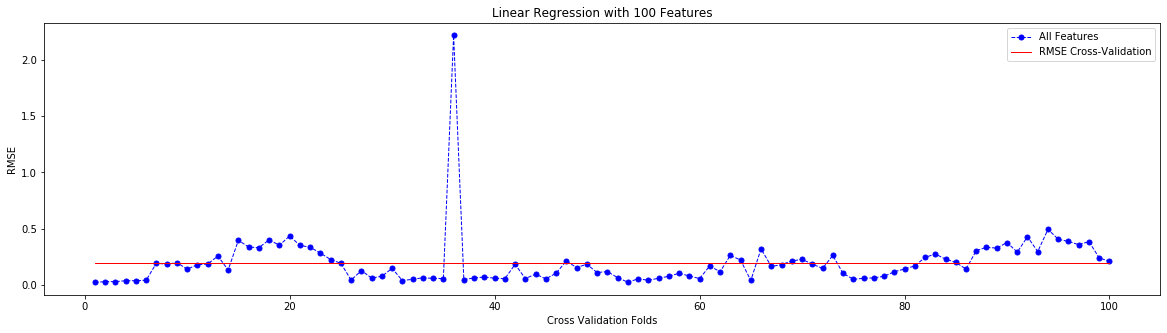

In [69]:
plt.figure(figsize=(20,5))

#x-axis tick range
x_values = range(1, len(rmse_list) + 1)

mean_values = [rmse_list.mean()] * len(rmse_list)

#plotting x and y-axis graph markers
line, = plt.plot(x_values, rmse_list, color= 'blue', linestyle = '--', linewidth = 1, marker='o', markerfacecolor = 'blue', markersize = 5, label ='All Features')
line_mean, = plt.plot(x_values, mean_values, color= 'red', linestyle = '-', linewidth = 1, label ='RMSE Cross-Validation')

plt.legend(handles = [line, line_mean])

#x-axis title
plt.xlabel('Cross Validation Folds')

#y-axis title 
plt.ylabel('RMSE') 
  
#graph title
plt.title('Linear Regression with 100 Features')
plt.show()

### Decision Tree

In [70]:
my_decisiontree = DecisionTreeClassifier()

my_decisiontree.fit(X_train, y_train)

y_predict_dt = my_decisiontree.predict(X_test)

print(y_predict_dt)

[0 1 1 ... 0 1 1]


In [71]:
score_dt = accuracy_score(y_test, y_predict_dt)

print("Accuracy :", score_dt)

Accuracy : 0.9450375642546461


<p>Let's see if bagging will produce an accuracy different from one decision tree.</p>

<p>Errors given when n_samples are greater than 79:<br><li>---> 17 accuracy = accuracy_score(y_test, voting)</li><li>ValueError: Input contains NaN, infinity or a value too large for dtype('float64').</li></p>

<p>Why is it that when we use 20 Decision Trees, the voting dataframe has two columns. One column with actual vote data and the other with 'Nan'?</p>  

In [72]:
bootstrap_size = int(0.8 * len(X_train))
predictions = pd.DataFrame()
Base_DecisionTree = DecisionTreeClassifier(random_state = 3)

for i in range(19):
    X_train_i, y_train_i = resample(X_train, y_train, n_samples=bootstrap_size, random_state=i, replace=True)
    Base_DecisionTree.fit(X_train_i, y_train_i)
    predictions[i] = Base_DecisionTree.predict(X_test)

#each column in predictions database is an individual tree with the column being its label outputs

voting = predictions.mode(axis=1)

display(voting)

# vote and compare against y_test
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html (reference)
score_bagging = accuracy_score(y_test, voting)

accuracy_list.append(('Bagging', score_bagging))

print("bootstrap size: ", bootstrap_size)

print("Accuracy: ", score_bagging)

,0
0,0
1,1
2,1
3,1
4,1
...,...
5053,1
5054,1
5055,0
5056,1


bootstrap size:  9440
Accuracy:  0.9622380387504943


### Random Forest

<li>For n_estimators = 19 ---> 0.9373828271466067</li>
<li>For n_estimators = 20 ---> 0.9400074990626172</li>

In [73]:
my_RandomForest = RandomForestClassifier(n_estimators=bootstrap_size, bootstrap=True, random_state=3)

my_RandomForest.fit(X_train, y_train)

y_predict_rf = my_RandomForest.predict(X_test)

score_rf = accuracy_score(y_test, y_predict_rf)

accuracy_list.append(('Random Forest', score_rf))

print('Accuracy: ', score_rf)

Accuracy:  0.9677738236457097


### KNN

In [74]:
k = len(X_train)
my_knn = KNeighborsClassifier(n_neighbors=k)
my_knn.fit(X_train, y_train)
y_predict = my_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy: ", accuracy)

Accuracy:  0.49782522736259394


<p>Check the value counts for test to see if we have unbalanced problem like before. Looks like no.</p>

In [75]:
y_test.value_counts()

1    2540
0    2518
Name: WnvPresent, dtype: int64

In [76]:
k_list = [1, 100, 500, 1000, 2000, 3000, 4000, 5000, len(X_train)]
accuracy_list_knn = []

for k in k_list:
    my_knn = KNeighborsClassifier(n_neighbors=k)
    my_knn.fit(X_train, y_train)
    y_predict = my_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    accuracy_list_knn.append(accuracy)
    
print(accuracy_list_knn)

[0.9406880189798339, 0.8167259786476868, 0.7694741004349546, 0.6979043100039541, 0.6526294978252274, 0.6466982997232108, 0.6466982997232108, 0.6186239620403321, 0.49782522736259394]


,k,Accuracy
0,1,0.940688
1,100,0.816726
2,500,0.769474
3,1000,0.697904
4,2000,0.652629
5,3000,0.646698
6,4000,0.646698
7,5000,0.618624
8,11800,0.497825


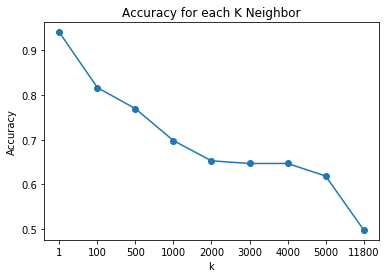

In [77]:
k_df = pd.DataFrame({
    'k': k_list,
    'Accuracy': accuracy_list_knn
})

#A list of positions at which ticks should be placed. You can pass an empty list to disable xticks.
ticks = [i for i in range(len(k_list))] 

plt.plot(ticks, accuracy_list_knn, marker='o') #plotting x and y-axis graph markers
plt.xticks(ticks, k_list) #plotting each k neighbor onto its respective x-axis marker
plt.title('Accuracy for each K Neighbor')
plt.xlabel('k')
plt.ylabel('Accuracy')

display(k_df.nlargest(len(accuracy_list_knn), ['Accuracy']))
plt.show()

### Let's compare accuracies from classifying ML:

In [78]:
classifier = []
class_accuracy = []

for i in range(len(accuracy_list)):
    name, value = accuracy_list[i]
    classifier.append(name)
    class_accuracy.append(value)

In [79]:
class_accuracy[0].dtype

dtype('float64')

,Classifier,Accuracy
2,Random Forest,0.967774
1,Bagging,0.962238
0,Logistic Regression,0.878608


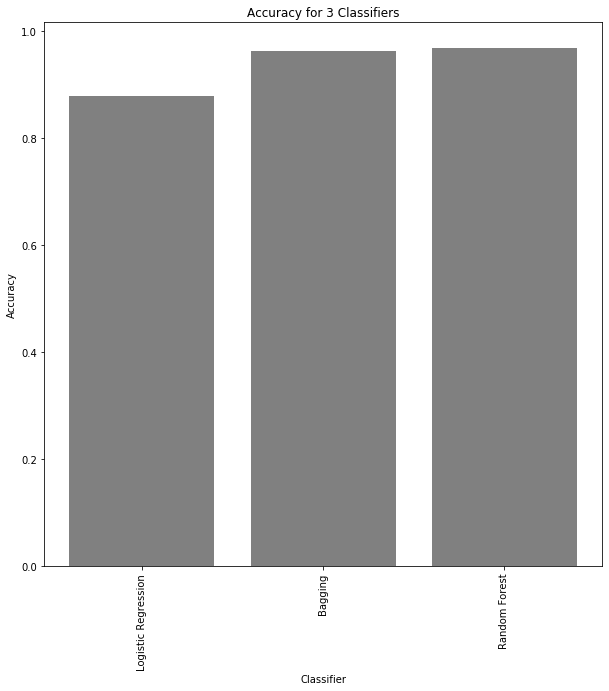

In [80]:
df = pd.DataFrame({
    'Classifier': classifier,
    'Accuracy': class_accuracy
})

df = df.nlargest(len(class_accuracy), ['Accuracy'])

display(df)

plt.figure(figsize=(10,10))

x_labels = classifier
y_pos = np.arange(len(x_labels))

plt.bar(y_pos, class_accuracy, color='gray')
plt.xticks(y_pos, x_labels, rotation='vertical')
plt.title('Accuracy for 3 Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()